In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ekg = scipy.datasets.electrocardiogram();

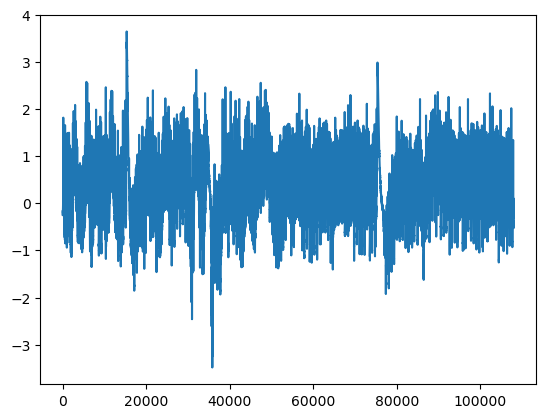

In [2]:
plt.plot(ekg);

This is the whole 5 minutes of data squeezed into one plot. The ekg waves are all mashed together due to the short x axis length. Lets plot a smaller portion of the ekg:

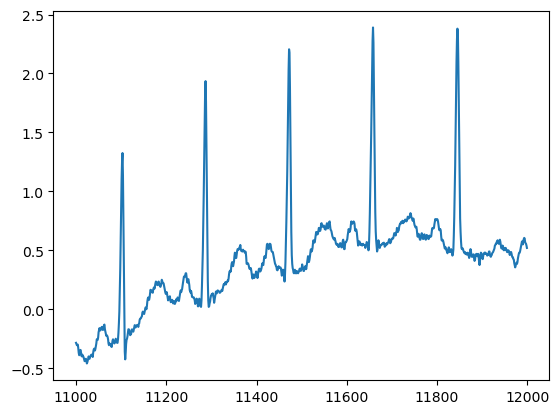

In [3]:
x_values = range(11000, 12000);
x_values = np.arange(11000, 12000)
plt.plot(x_values, ekg[11000:12000]);

In this data, we can clearly see the QRS complexes are (conveniently) the tallest peaks, while the p and t waves are the 2 smaller bumps in between each QRS complex. I'll use SciPy's find_peaks() function with a threshold height of 1.0 to find the time indices of the 5 QRS complexs' peaks in the segment above:

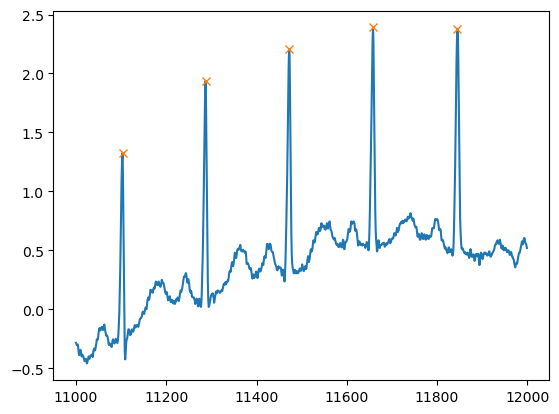

In [4]:
exRange = ekg[11000:12000];
r_waves, metadata = scipy.signal.find_peaks(exRange, height = 1);
#r_waves += 11000;

plt.plot(x_values, exRange);
plt.plot(x_values[r_waves], exRange[r_waves], "x");

Next, I'll use a Savitzky-Golay filter to smooth out the jagged edges due to noise.

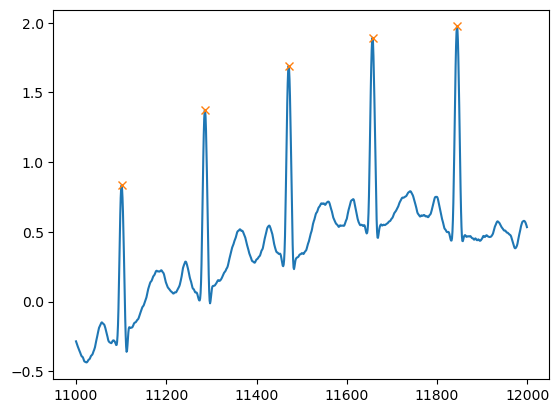

In [17]:
filtered = scipy.signal.savgol_filter(exRange, window_length=20, polyorder=2);
filtered = pd.Series(filtered, index=x_values);
r_waves_filtered, metaa = scipy.signal.find_peaks(filtered, height = 0.8);
filtered.plot();
plt.plot(x_values[r_waves_filtered], filtered.iloc[r_waves_filtered], "x");

Now, I'll label the p and t waves. Recall that the p wave represents atrial depolarization and, in a normal sinus rhythm, is the small positive peak before the QRS complex, while the t wave represents a portion of ventricular repolarization, and is the small peak right after the QRS complex.